## 신용 등급 평가 데이터 Description

ID :  Represents a unique identification of an entry

Customer_ID :  Represents a unique identification of a person

Month :  Represents the month of the year

Name :  Represents the name of a person

Age : Represents the age of the person

SSN : Represents the social security number of a person

Occupation : Represents the occupation of the person

Annual_Income : Represents the annual income of the person

Monthly_Inhand_Salary : Represents the monthly base salary of a person

Num_Bank_Accounts : Represents the number of bank accounts a person holds

Num_Credit_Card : Represents the number of other credit cards held by a person

Interest_Rate : Represents the interest rate on credit card

Num_of_Loan : Represents the number of loans taken from the bank

Type_of_Loan : Represents the types of loan taken by a person

Delay_from_due_date : Represents the average number of days delayed from the payment date

Num_of_Delayed_Payment : Represents the average number of payments delayed by a person

Changed_Credit_Limit : Represents the percentage change in credit card limit

Num_Credit_Inquiries : Represents the number of credit card inquiries

Credit_Mix : Represents the classification of the mix of credits

Outstanding_Debt : Represents the remaining debt to be paid (in USD)

Credit_Utilization_Ratio : Represents the utilization ratio of credit card

Credit_History_Age : Represents the age of credit history of the person

Payment_of_Min_Amount : Represents whether only the minimum amount was paid by the person

Total_EMI_per_month : Represents the monthly EMI payments (in USD)

Amount_invested_monthly : Represents the monthly amount invested by the customer (in USD)

Payment_Behaviour : Represents the payment behavior of the customer (in USD)

Monthly_Balance : Represents the monthly balance amount of the customer (in USD)

In [84]:
# test. train 데이터 불러오기
import pandas as pd
import numpy as np

test = pd.read_csv('./test.csv')
train = pd.read_csv('./train.csv')

In [85]:
# train 데이터 컬럼 불러오기
train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [86]:
# train 데이터 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [87]:
#  부동 소수점 데이터 삭제
problematic_rows = train[train['Monthly_Balance'] == '__-333333333333333333333333333__']
train.loc[problematic_rows.index, 'Monthly_Balance'] = np.nan
train['Monthly_Balance'] = train['Monthly_Balance'].astype(np.float64)

## 데이터 전처리

#### 카테고리 데이터 전처리

In [88]:
# train 데이터에서 데이터 타입이 object인 것만 추출
category_train = train.select_dtypes(include = object)
category_train.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,NaN,No,118.28022162236736,Low_spent_Large_value_payments,Good


In [89]:
# category_train 데이터 정보 확인
category_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       100000 non-null  object
 1   Customer_ID              100000 non-null  object
 2   Month                    100000 non-null  object
 3   Name                     90015 non-null   object
 4   Age                      100000 non-null  object
 5   SSN                      100000 non-null  object
 6   Occupation               100000 non-null  object
 7   Annual_Income            100000 non-null  object
 8   Num_of_Loan              100000 non-null  object
 9   Type_of_Loan             88592 non-null   object
 10  Num_of_Delayed_Payment   92998 non-null   object
 11  Changed_Credit_Limit     100000 non-null  object
 12  Credit_Mix               100000 non-null  object
 13  Outstanding_Debt         100000 non-null  object
 14  Credit_History_Age   

In [90]:
# 각 열의 결측값을 해당 열의 최빈값으로 채움

for col in category_train.columns[:-1]:
    mode_value = category_train[col].mode()[0] #최빈값 계산
    category_train[col].fillna(mode_value, inplace = True)

In [91]:
# category_train의 결측값이 최빈값으로 채워졌는지 확인
category_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       100000 non-null  object
 1   Customer_ID              100000 non-null  object
 2   Month                    100000 non-null  object
 3   Name                     100000 non-null  object
 4   Age                      100000 non-null  object
 5   SSN                      100000 non-null  object
 6   Occupation               100000 non-null  object
 7   Annual_Income            100000 non-null  object
 8   Num_of_Loan              100000 non-null  object
 9   Type_of_Loan             100000 non-null  object
 10  Num_of_Delayed_Payment   100000 non-null  object
 11  Changed_Credit_Limit     100000 non-null  object
 12  Credit_Mix               100000 non-null  object
 13  Outstanding_Debt         100000 non-null  object
 14  Credit_History_Age   

#### 카테고리데이터 라벨인코딩 전처리

In [92]:
category_train.columns[2:-1] # ID와 고객ID, 정답값 제외


Index(['Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income',
       'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour'],
      dtype='object')

In [93]:
# 명목형 데이터를 수치형 데이터로 변환
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 각 열에 대해 라벨 인코딩 수행
for col in category_train.columns:
    try:
        label_encoders = LabelEncoder()
        train[col] = label_encoders.fit_transform(train[col])
    except:
        print(col)

In [94]:
# 수치형 데이터로 변환됐는지 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int32  
 1   Customer_ID               100000 non-null  int32  
 2   Month                     100000 non-null  int32  
 3   Name                      100000 non-null  int32  
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  int32  
 6   Occupation                100000 non-null  int32  
 7   Annual_Income             100000 non-null  int32  
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              100000 non-null  in

In [95]:
# 수치형 데이터로 변환됐는지 확인
train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,16406,12320,3,84,308,10205,12,6011,1824.843333,3,4,3,244,128,3,685,1185,4.0,3,12062,26.822620,180,1,49.574949,81513,3,312.494089,0
1,16417,12320,2,84,308,10205,12,6011,NaN,3,4,3,244,128,-1,749,1185,4.0,1,12062,31.944960,404,1,49.574949,7661,4,284.629162,0
2,16428,12320,6,84,0,10205,12,6011,NaN,3,4,3,244,128,3,685,4383,4.0,1,12062,28.609352,184,1,49.574949,82226,5,331.209863,0
3,16441,12320,0,84,308,10205,12,6011,NaN,3,4,3,244,128,5,570,3906,4.0,1,12062,31.377862,185,1,49.574949,30358,6,223.451310,0
4,16452,12320,7,84,308,10205,12,6011,1824.843333,3,4,3,244,128,6,749,1185,4.0,1,12062,24.797347,186,1,49.574949,55363,2,341.489231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,62788,8833,0,6528,364,1009,9,11484,3359.415833,4,6,7,174,683,23,685,1208,3.0,3,10142,34.663572,307,1,35.104023,69764,1,479.866228,1
99996,62789,8833,7,6528,364,1009,9,11484,3359.415833,4,6,7,174,683,18,685,1208,3.0,3,10142,40.565631,308,1,35.104023,65282,2,496.651610,1
99997,62790,8833,5,6528,364,1009,9,11484,3359.415833,4,6,5729,174,683,27,671,1208,3.0,1,10142,41.255522,309,1,35.104023,37143,1,516.809083,1
99998,62791,8833,4,6528,364,1009,9,11484,3359.415833,4,6,7,174,683,20,749,1208,3.0,1,10142,33.638208,310,1,35.104023,39061,4,319.164979,2


In [96]:
X = train.iloc[:, 2:-1] # ID, CUstomer_ID 와 정답값 제외
X = X.fillna(X.mean()) # 결측값을 평균값으로 채움
y = train['Credit_Score']


In [97]:
X # 결측값 잘 채워졌는지 확인

,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,3,84,308,10205,12,6011,1824.843333,3,4,3,244,128,3,685,1185,4.0,3,12062,26.822620,180,1,49.574949,81513,3,312.494089
1,2,84,308,10205,12,6011,4194.170850,3,4,3,244,128,-1,749,1185,4.0,1,12062,31.944960,404,1,49.574949,7661,4,284.629162
2,6,84,0,10205,12,6011,4194.170850,3,4,3,244,128,3,685,4383,4.0,1,12062,28.609352,184,1,49.574949,82226,5,331.209863
3,0,84,308,10205,12,6011,4194.170850,3,4,3,244,128,5,570,3906,4.0,1,12062,31.377862,185,1,49.574949,30358,6,223.451310
4,7,84,308,10205,12,6011,1824.843333,3,4,3,244,128,6,749,1185,4.0,1,12062,24.797347,186,1,49.574949,55363,2,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,6528,364,1009,9,11484,3359.415833,4,6,7,174,683,23,685,1208,3.0,3,10142,34.663572,307,1,35.104023,69764,1,479.866228
99996,7,6528,364,1009,9,11484,3359.415833,4,6,7,174,683,18,685,1208,3.0,3,10142,40.565631,308,1,35.104023,65282,2,496.651610
99997,5,6528,364,1009,9,11484,3359.415833,4,6,5729,174,683,27,671,1208,3.0,1,10142,41.255522,309,1,35.104023,37143,1,516.809083
99998,4,6528,364,1009,9,11484,3359.415833,4,6,7,174,683,20,749,1208,3.0,1,10142,33.638208,310,1,35.104023,39061,4,319.164979


In [98]:
y.value_counts() # 데이터 불균형 있음

2    53174
1    28998
0    17828
Name: Credit_Score, dtype: int64

* 클래스 0에 대한 샘플 수가 다른 클래스에 비해 상대적으로 매우 작음.
* 데이터의 불균형이 있음.
* 데이터 불균형 문제를 해결하기 위해 오버샘플링 수행.
*     -> 오버샘플링은 소수 클래스의 데이터를 복제하거나 합성하여 클래스 간의 데이터 수를 균형을 맞춰줌.

In [99]:
from sklearn.model_selection import train_test_split

# 데이터 분할 -> 훈련 데이터와 검증 데이터를 8:2로 나눔.
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
from imblearn.over_sampling import SMOTE

# 오버샘플링 수행
over_sampler = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train, y_train)

In [102]:
y_train_resampled.value_counts() # 오버샘플링 잘 수행됐는지 확인

2    42575
0    42575
1    42575
Name: Credit_Score, dtype: int64

*  오버샘플링 후, 효과적으로 그룹화하여 데이터셋을 균형있게 만들기 위해 KMeans 수행.

In [103]:
from sklearn.cluster import KMeans

# KMeans 클러스터링
kmeans = KMeans(n_clusters=3, random_state=7)
kmeans.fit(X_train_resampled)
train_clusters = kmeans.labels_

In [107]:
# 각 클러스터의 중심점 확인
centroid = pd.DataFrame(kmeans.cluster_centers_, columns= X_train.columns)
centroid ['cluster'] = ['Cluster is {}'.format(i) for i in centroid.index]
display(centroid)

,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,cluster
0,3.345600,5623.671954,555.852066,5876.110563,7.311587,10128.815625,4555.388200,15.698464,20.557318,65.993498,185.950173,3578.202596,19.760295,291.771942,2674.919924,26.351686,1.412028,6598.052257,32.354769,215.629582,1.268739,1481.463652,48667.252638,3.347053,411.454288,Cluster is 0
1,3.305641,5596.447283,553.361041,5899.256139,7.352557,9262.893914,4149.234297,16.736730,21.993135,66.079136,190.005052,3536.221672,20.024123,292.411462,2674.991226,24.703386,1.417070,6557.613845,32.359455,215.457193,1.271657,1308.237081,15982.021778,3.253094,417.458468,Cluster is 1
2,3.350095,5597.023440,556.818856,5842.245695,7.372273,9150.601424,4220.803216,16.345474,22.677583,59.288091,189.840290,3536.515462,20.237040,292.646186,2660.493712,27.759705,1.419739,6557.162121,32.221877,215.695636,1.279098,1494.576651,81406.831906,3.317594,395.726604,Cluster is 2


In [108]:
# 훈련 데이터셋의 클래스 분포
# 오버샘플링 수행 후의 훈련 데이터셋의 분포
# 클러스터링까지 마친 훈련 데이터셋의 분포를 출력
print("\n초기 훈련 데이터셋의 클래스 분포:", np.bincount(y_train))
print("오버샘플링 수행 후, 훈련 데이터셋의 분포:", np.bincount(y_train_resampled))
print("클러스터링까지 마친 훈련 데이터셋의 분포:", np.bincount(train_clusters))


초기 훈련 데이터셋의 클래스 분포: [14301 23124 42575]
오버샘플링 수행 후, 훈련 데이터셋의 분포: [42575 42575 42575]
클러스터링까지 마친 훈련 데이터셋의 분포: [41997 41330 44398]


In [109]:
# 훈련 데이터셋과 검증 데이터셋을 스케일링
from sklearn .preprocessing import RobustScaler

rf = RobustScaler()
X_train_resampled_rf = rf.fit_transform(X_train_resampled)
X_valid_rf = rf.transform(X_valid) 


In [111]:
# 여러 분류모델의 성능을 비교하여 최상의 모델 선택
from pycaret.classification import setup
from pycaret.classification import compare_models

grid = setup(data = train, target = "Credit_Score", verbose = True)
best = compare_models()
best

,Description,Value
0,Session id,8466
1,Target,Credit_Score
2,Target type,Multiclass
3,Original data shape,"(100000, 28)"
4,Transformed data shape,"(100000, 28)"
5,Transformed train set shape,"(70000, 28)"
6,Transformed test set shape,"(30000, 28)"
7,Numeric features,27
8,Rows with missing values,17.7%
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7813,0.8893,0.7813,0.7809,0.7810,0.6349,0.6349,7.3800
et,Extra Trees Classifier,0.7588,0.8741,0.7588,0.7584,0.7581,0.5942,0.5948,3.0550
xgboost,Extreme Gradient Boosting,0.7580,0.8783,0.7580,0.7577,0.7576,0.5948,0.5951,1.8800
catboost,CatBoost Classifier,0.7483,0.8694,0.7483,0.7480,0.7478,0.5779,0.5783,23.2680
lightgbm,Light Gradient Boosting Machine,0.7310,0.8618,0.7310,0.7325,0.7310,0.5522,0.5527,1.6800
gbc,Gradient Boosting Classifier,0.6968,0.8307,0.6968,0.6983,0.6951,0.4874,0.4893,31.4210
dt,Decision Tree Classifier,0.6712,0.7200,0.6712,0.6714,0.6713,0.4536,0.4536,0.5500
ada,Ada Boost Classifier,0.6400,0.7335,0.6400,0.6373,0.6357,0.3834,0.3859,2.1930
qda,Quadratic Discriminant Analysis,0.5958,0.7236,0.5958,0.6020,0.5980,0.3375,0.3381,0.0970
lda,Linear Discriminant Analysis,0.5912,0.7189,0.5912,0.5840,0.5670,0.2534,0.2684,0.2000


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=8466, verbose=0, warm_start=False)

--  PyCaret을 통해 상위 5개의 모델선택  --
*  Random Forest Classifier
*  Extra Trees Classifier
*  Extreme Gradient Boosting
*  CatBoost Classifier
*  Light Gradient Boosting Machine

## 분류 수행

#### 1) Random Forest Classifier

In [115]:
# RandomForestClassifier로 분류 수행
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier

# 모델 생성
rnd_clf = RandomForestClassifier(n_estimators=30, random_state=42)
# 모델 훈련
rnd_clf.fit(X_train_resampled, y_train_resampled)
# 검증 데이터 예측
y_pred_rnd = rnd_clf.predict(X_valid)

# 모델 평가
# 정확도
print("Accuracy Score:", accuracy_score(y_pred_rnd, y_valid))
# F1 Score
print("F1 Score:", f1_score(y_pred_rnd, y_valid, average='macro'))
# 혼동 행렬
print("Confusion Matrix:\n", confusion_matrix(y_pred_rnd, y_valid))
# 재현율
print("Recall Score:", recall_score(y_pred_rnd, y_valid, average = 'macro'))
# 정밀도
print("Precision Score:", precision_score(y_pred_rnd, y_valid, average = 'macro'))

Accuracy Score: 0.7595
F1 Score: 0.7471455354696023
Confusion Matrix:
 [[2685  292 1271]
 [  41 4649 1472]
 [ 801  933 7856]]
Recall Score: 0.7352372121324228
Precision Score: 0.764642021993498


#### 2) Extra Trees Classifier

In [116]:
# EXtraTreesClassifier로 분류 수행
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
from sklearn.ensemble import ExtraTreesClassifier

# Extra Trees Classifier 모델 생성
et_clf = ExtraTreesClassifier(random_state=42)

# 모델 훈련
et_clf.fit(X_train_resampled_rf, y_train_resampled)

# 검증 데이터 예측
y_pred_et = et_clf.predict(X_valid_rf)

# 모델평가
print("Accuracy Score:", accuracy_score(y_valid, y_pred_et))
print("F1 Score:", f1_score(y_valid, y_pred_et, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred_et))
print("Recall Score:", recall_score(y_valid, y_pred_et, average='macro'))
print("Precision Score:", precision_score(y_valid, y_pred_et, average='macro'))

Accuracy Score: 0.7313
F1 Score: 0.7184214852105382
Confusion Matrix:
 [[2705   44  778]
 [ 453 4382 1039]
 [1514 1546 7539]]
Recall Score: 0.7414111933768025
Precision Score: 0.7061772578369642


#### 3) Extreme Gradient Boosting

In [117]:
# XGBClassifier로 분류 수행
import xgboost

# XGBClassifier 모델 생성
xgb_clf = xgboost.XGBClassifier(random_state = 42)
# 모델 훈련
xgb_clf.fit(X_train_resampled_rf, y_train_resampled)
# 검증 데이터 예측
y_pred_xgb = xgb_clf.predict(X_valid_rf)

print("Accuracy Score:", accuracy_score(y_pred_xgb, y_valid))
print("F1 Score:", f1_score(y_pred_xgb, y_valid, average = 'macro'))
print("Confusion Matrix:\n", confusion_matrix(y_pred_xgb, y_valid))
print("Recall Score:", recall_score(y_pred_xgb, y_valid, average = 'macro'))
print("Precision Score:", precision_score(y_pred_xgb, y_valid, average = 'macro'))

Accuracy Score: 0.7384
F1 Score: 0.7244040087913479
Confusion Matrix:
 [[2494  241 1088]
 [  62 4308 1545]
 [ 971 1325 7966]]
Recall Score: 0.7189823413681543
Precision Score: 0.7306994324756456


#### 4) CatBoost Classifier

In [123]:
# CatBoostClassifier로 분류수행
from catboost import CatBoostClassifier, Pool

# CatBoost 데이터셋으로 변환
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_valid, y_valid)

# CatBoost 모델 파라미터 설정
params = {
    'iterations': 100,
    'learning_rate': 0.1,
    'depth': 6,
    'loss_function': 'MultiClass',
    'verbose': 0
}

# 모델 학습
model = CatBoostClassifier(**params)
model.fit(train_pool)

# 검증 데이터 예측
y_pred_catb = model.predict(test_pool)

# 모델 평가
print("Accuracy Score:", accuracy_score(y_pred_catb, y_valid))
print("F1 Score:", f1_score(y_pred_catb, y_valid, average = 'macro'))
print("Confusion Matrix:\n", confusion_matrix(y_pred_catb, y_valid))
print("Recall Score:", recall_score(y_pred_catb, y_valid, average = 'macro'))
print("Precision Score:", precision_score(y_pred_catb, y_valid, average = 'macro'))

Accuracy Score: 0.69025
F1 Score: 0.6644855822598396
Confusion Matrix:
 [[2163  345 1220]
 [ 110 3624 1361]
 [1254 1905 8018]]
Recall Score: 0.669618485419177
Precision Score: 0.6622372019376793


#### 5) Light Gradient Boosting Machine

In [124]:
# LightGBM으로 분류 수행
import lightgbm as lgb

# LightGBM 데이터셋으로 변환
train_data = lgb.Dataset(X_train, label = y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

# LightGBM 모델 파라미터 설정
params = {
    'objective': 'multiclass',
    'num_class': 3,
    'metric': 'multi_error',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
}

# 모델 학습
num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[train_data, valid_data], valid_names=['train', 'valid'])

# 검증 데이터 예측
y_pred_lgb = bst.predict(X_valid, num_iteration=bst.best_iteration)
y_pred_lgb = [list(x).index(max(x)) for x in y_pred_lgb]

# 모델 평가
print("Accuracy Score:", accuracy_score(y_pred_lgb, y_valid))
print("F1 Score:", f1_score(y_pred_lgb, y_valid, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_pred_lgb, y_valid))
print("Recall Score:", recall_score(y_pred_lgb, y_valid, average = 'macro'))
print("Precision Score:", precision_score(y_pred_lgb, y_valid, average = 'macro'))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4710
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 25
[LightGBM] [Info] Start training from score -1.721697
[LightGBM] [Info] Start training from score -1.241156
[LightGBM] [Info] Start training from score -0.630759
Accuracy Score: 0.72195
F1 Score: 0.703090788987192
Confusion Matrix:
 [[2385  282 1130]
 [  62 3928 1343]
 [1080 1664 8126]]
Recall Score: 0.7040785335659163
Precision Score: 0.7038659157861522


## 모델 성능 시각화

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 예측값과 실제값 비교하여 각 성능 지표 계산
models = {'RandomForest': y_pred_rnd,
          'EXtraTrees': y_pred_et,
          'XGBoost': y_pred_xgb,
          'CatBoost': y_pred_catb,
          'LightGBM': y_pred_lgb,}

# 각 성능 지표 계산
f1_scores = {model_name: f1_score(y_valid, y_pred, average='macro') for model_name, y_pred in models.items()}
accuracy_scores = {model_name: accuracy_score(y_valid, y_pred) for model_name, y_pred in models.items()}
recall_scores = {model_name: recall_score(y_valid, y_pred, average='macro') for model_name, y_pred in models.items()}
precision_scores = {model_name: precision_score(y_valid, y_pred, average='macro') for model_name, y_pred in models.items()}

#### 1) F1 Score

([0, 1, 2, 3, 4],
 [Text(0, 0, 'RandomForest'),
  Text(1, 0, 'EXtraTrees'),
  Text(2, 0, 'XGBoost'),
  Text(3, 0, 'CatBoost'),
  Text(4, 0, 'LightGBM')])

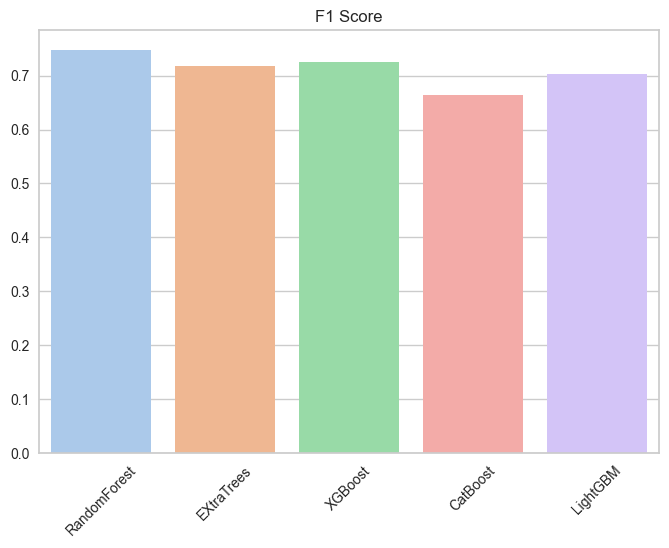

In [134]:
# 막대 그래프 생성
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), palette='pastel')
plt.title('F1 Score')
plt.xticks(rotation=45)


#### 2) Accuracy Score

([0, 1, 2, 3, 4],
 [Text(0, 0, 'RandomForest'),
  Text(1, 0, 'EXtraTrees'),
  Text(2, 0, 'XGBoost'),
  Text(3, 0, 'CatBoost'),
  Text(4, 0, 'LightGBM')])

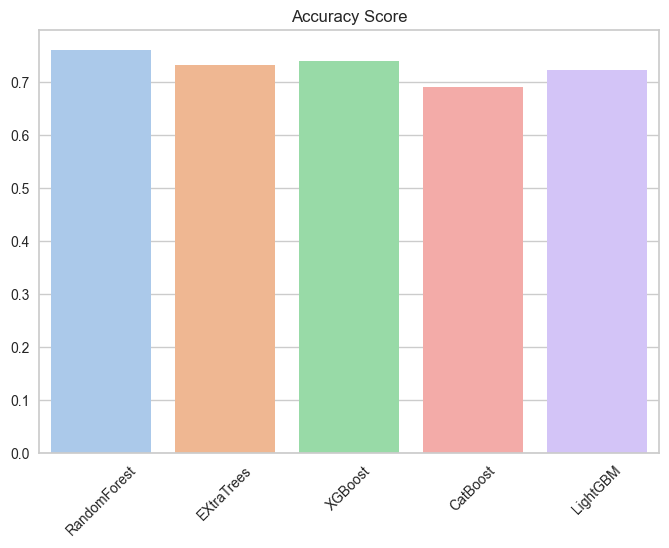

In [135]:
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='pastel')
plt.title('Accuracy Score')
plt.xticks(rotation=45)

#### 3) Recall Score

([0, 1, 2, 3, 4],
 [Text(0, 0, 'RandomForest'),
  Text(1, 0, 'EXtraTrees'),
  Text(2, 0, 'XGBoost'),
  Text(3, 0, 'CatBoost'),
  Text(4, 0, 'LightGBM')])

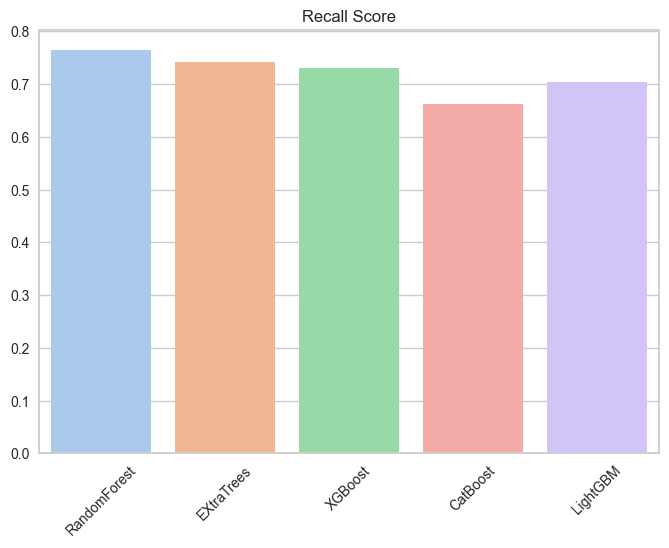

In [136]:
sns.barplot(x=list(recall_scores.keys()), y=list(recall_scores.values()), palette='pastel')
plt.title('Recall Score')
plt.xticks(rotation=45)

#### 4) Precision Score

([0, 1, 2, 3, 4],
 [Text(0, 0, 'RandomForest'),
  Text(1, 0, 'EXtraTrees'),
  Text(2, 0, 'XGBoost'),
  Text(3, 0, 'CatBoost'),
  Text(4, 0, 'LightGBM')])

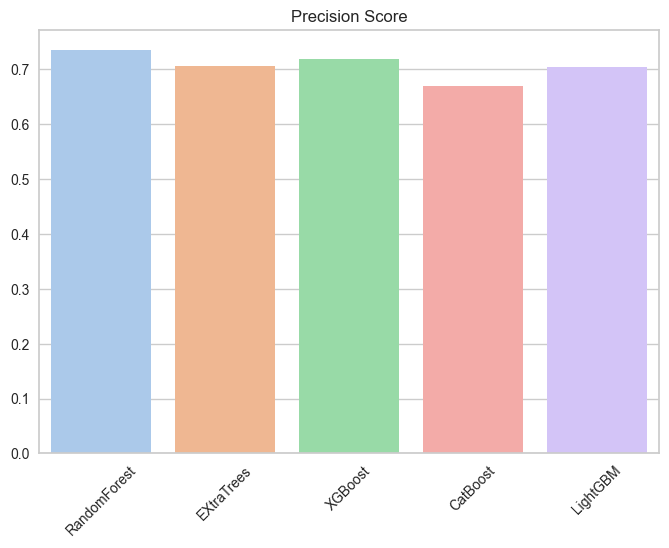

In [137]:
sns.barplot(x=list(precision_scores.keys()), y=list(precision_scores.values()), palette='pastel')
plt.title('Precision Score')
plt.xticks(rotation=45)